# Visualización de Datos

En este notebook, creamos y personalizamos gráficos que representan adecuadamente los datos del dataset `House Prices: Advanced Regression Techniques`.

## Objetivos
- Generar gráficos variados que muestren diferentes aspectos del dataset.
- Realizar agrupamientos y agregaciones para visualizar ciertas variables y sus interacciones.
- Justificar la creación de cada gráfico y la elección de las técnicas de visualización utilizadas.


## Carga del Dataset Enriquecido


In [11]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# Cargar el dataset enriquecido
train_df = pd.read_csv('data/processed/train_enriched.csv')

# Análisis de la Distribución de Precios de Venta

En este análisis, examinamos la distribución de los precios de venta de las casas en el dataset. La visualización incluye la mediana y los cuartiles, lo que nos permite obtener una mejor comprensión de la dispersión y centralización de los datos.

## Distribución de Precios de Venta

El siguiente gráfico muestra la distribución de los precios de venta, con líneas punteadas que indican la mediana, el primer cuartil (Q1) y el tercer cuartil (Q3). Estas líneas nos ayudan a identificar los puntos clave de la distribución.

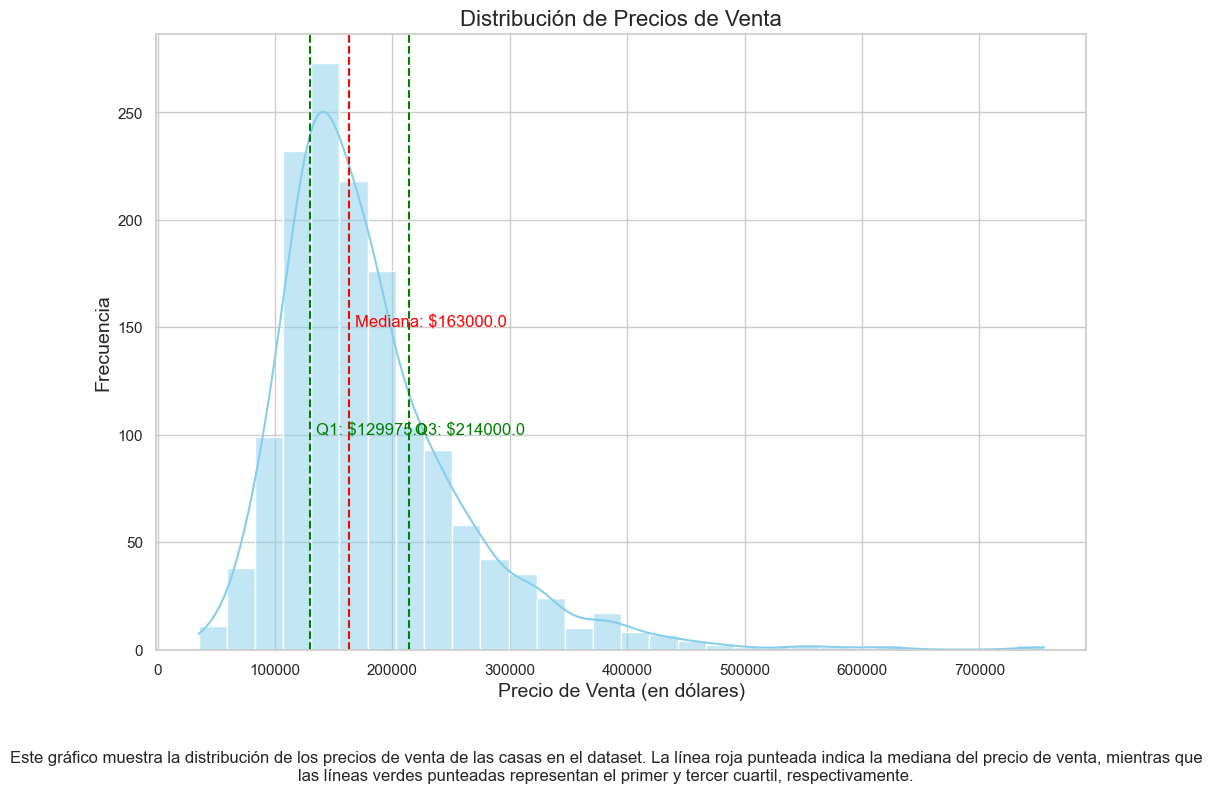

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(train_df['SalePrice'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Precios de Venta', fontsize=16)
plt.xlabel('Precio de Venta (en dólares)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Líneas de referencia para los cuartiles
median = train_df['SalePrice'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(median + 5000, 150, f'Mediana: ${median}', color='red', fontsize=12)

q1 = train_df['SalePrice'].quantile(0.25)
plt.axvline(q1, color='green', linestyle='--')
plt.text(q1 + 5000, 100, f'Q1: ${q1}', color='green', fontsize=12)

q3 = train_df['SalePrice'].quantile(0.75)
plt.axvline(q3, color='green', linestyle='--')
plt.text(q3 + 5000, 100, f'Q3: ${q3}', color='green', fontsize=12)

# Descripción del gráfico
plt.figtext(0.5, -0.05, 'Este gráfico muestra la distribución de los precios de venta de las casas en el dataset. '
                        'La línea roja punteada indica la mediana del precio de venta, mientras que las líneas verdes '
                        'punteadas representan el primer y tercer cuartil, respectivamente.', 
            wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


## Visualización de la Relación entre Espacio Total y Precio de Venta


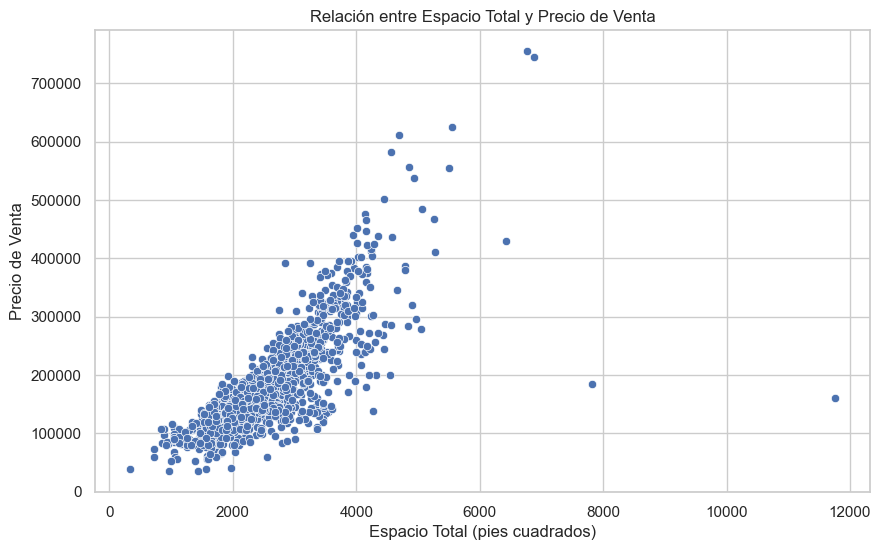

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSF', y='SalePrice', data=train_df)
plt.title('Relación entre Espacio Total y Precio de Venta')
plt.xlabel('Espacio Total (pies cuadrados)')
plt.ylabel('Precio de Venta')
plt.show()

# Análisis de Precios de Venta por Vecindario

En este análisis, hemos agrupado los datos de precios de venta por vecindario para identificar los vecindarios con los precios de venta promedio más altos y más bajos. Este tipo de visualización nos permite comprender mejor cómo varían los precios de las viviendas según la ubicación.

## Vecindarios con el Precio de Venta Promedio Más Alto

En el gráfico a continuación, se muestran los cinco vecindarios con el precio de venta promedio más alto. Esta información puede ser útil para identificar áreas de alta demanda y posibles oportunidades de inversión.

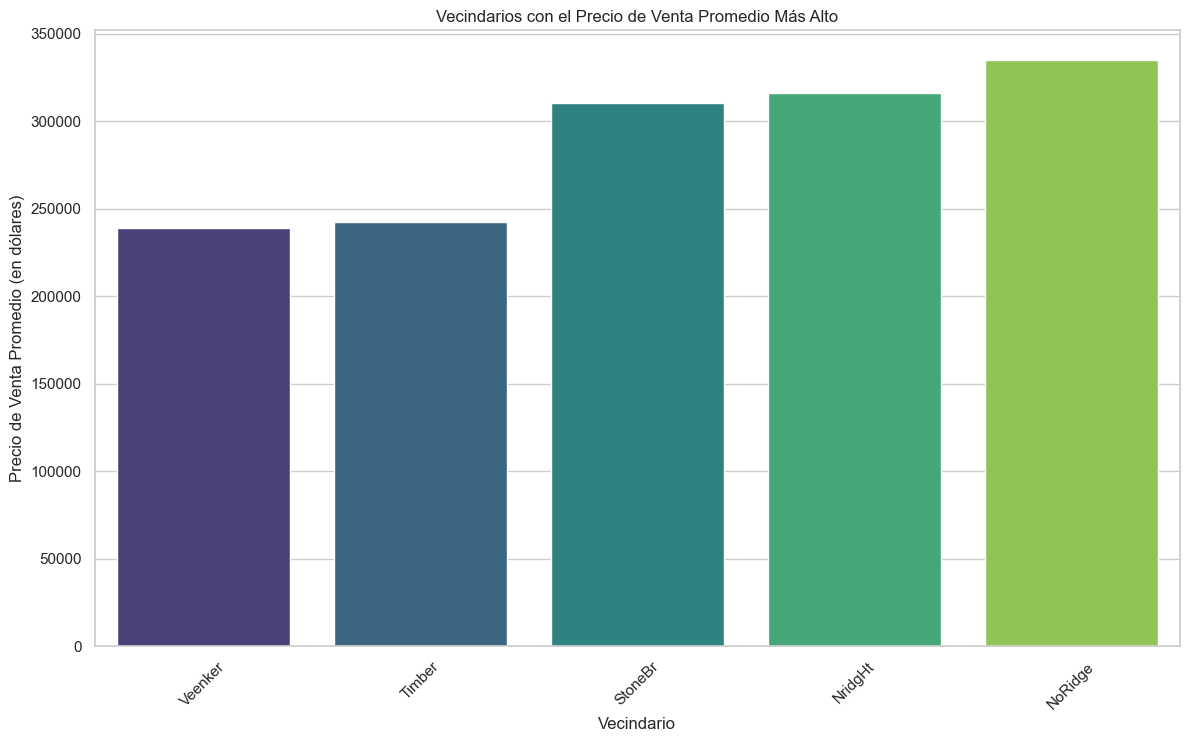

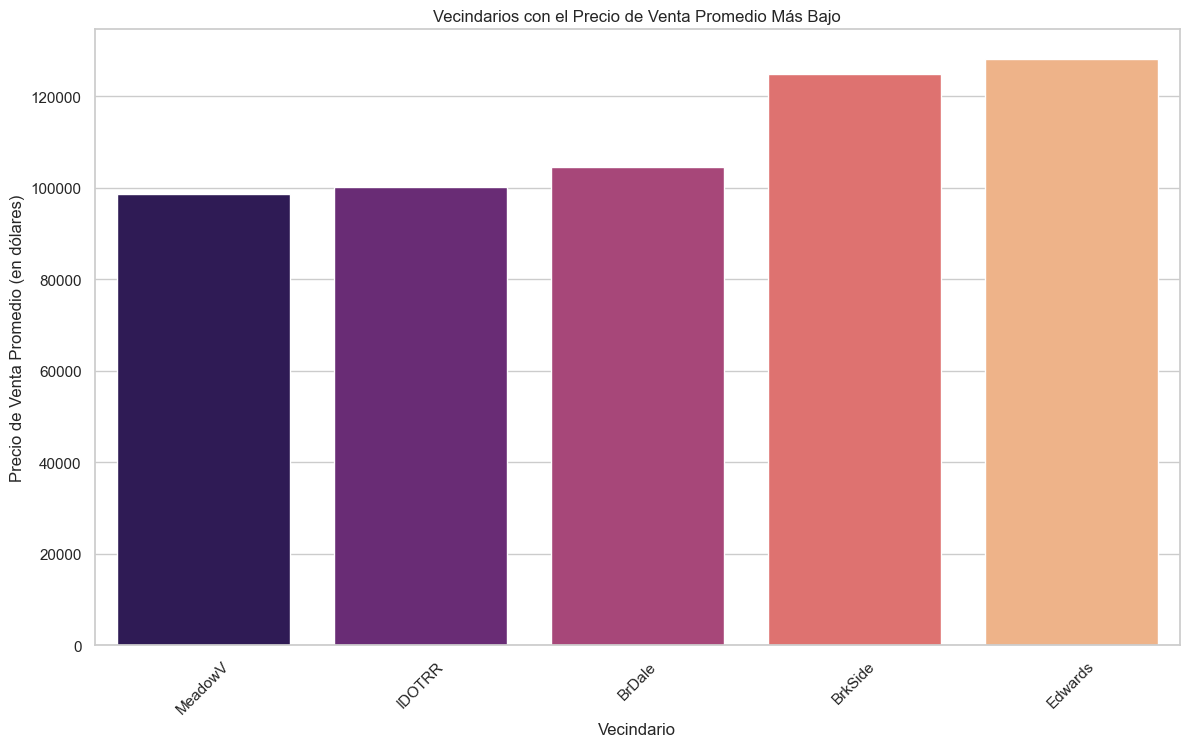

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mean_prices = train_df.groupby('Neighborhood')['SalePrice'].mean().sort_values()
top_neighborhoods = mean_prices[-5:]
bottom_neighborhoods = mean_prices[:5]

# Gráfico de vecindarios con el precio de venta promedio más alto
plt.figure(figsize=(14, 8))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis', hue=top_neighborhoods.index, dodge=False, legend=False)
plt.title('Vecindarios con el Precio de Venta Promedio Más Alto')
plt.xlabel('Vecindario')
plt.ylabel('Precio de Venta Promedio (en dólares)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de vecindarios con el precio de venta promedio más bajo
plt.figure(figsize=(14, 8))
sns.barplot(x=bottom_neighborhoods.index, y=bottom_neighborhoods.values, palette='magma', hue=bottom_neighborhoods.index, dodge=False, legend=False)
plt.title('Vecindarios con el Precio de Venta Promedio Más Bajo')
plt.xlabel('Vecindario')
plt.ylabel('Precio de Venta Promedio (en dólares)')
plt.xticks(rotation=45)
plt.show()
